In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_csv('D:\machine\dataset\\bank_transactions.csv')

In [29]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [30]:
data.isnull().sum()


TransactionID               0
CustomerID                  0
CustomerDOB                72
CustGender                 11
CustLocation                1
CustAccountBalance         27
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [31]:
data.duplicated().sum()

np.int64(0)

In [32]:
data.dropna(inplace=True)

In [33]:
Label_encoder = LabelEncoder()
data['CustLocation'] = Label_encoder.fit_transform(data['CustLocation'])

In [34]:
numeric_features=data[['CustAccountBalance','CustLocation','TransactionAmount (INR)']]

In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
scaled_features


array([[-1.41824169e-01, -2.30641021e-01, -2.34306824e-01],
       [-1.63397398e-01, -2.04547512e-01,  3.65358538e+00],
       [-1.41747316e-01,  5.19547356e-01, -1.73988484e-01],
       ...,
       [-2.64242290e-03,  5.19547356e-01,  2.34758601e-01],
       [-1.48196907e-01, -8.69931986e-01, -1.68290208e-01],
       [ 3.62880099e-01,  1.96773709e+00, -2.00256148e-01]])

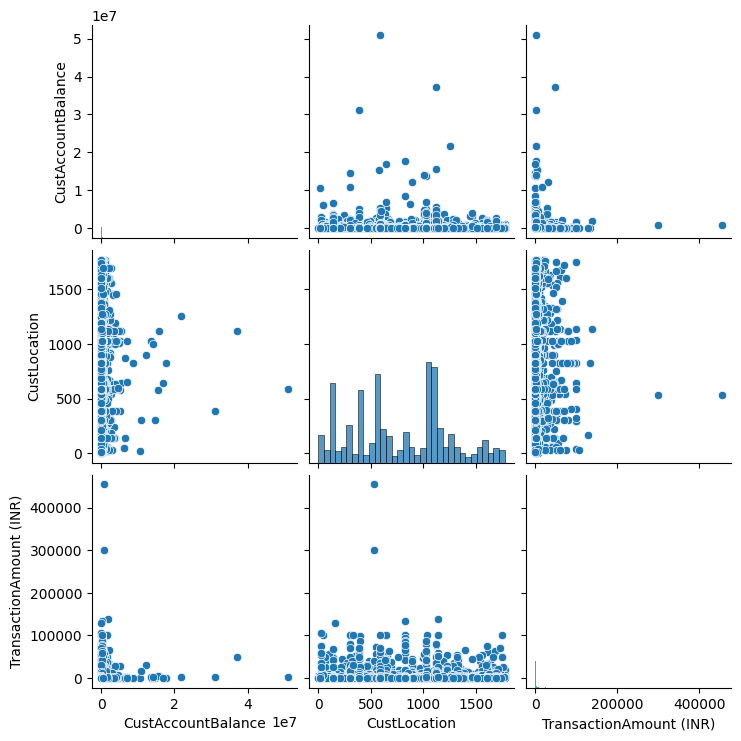

In [36]:
sns.pairplot(data[['CustAccountBalance','CustLocation', 'TransactionAmount (INR)']])
plt.show()

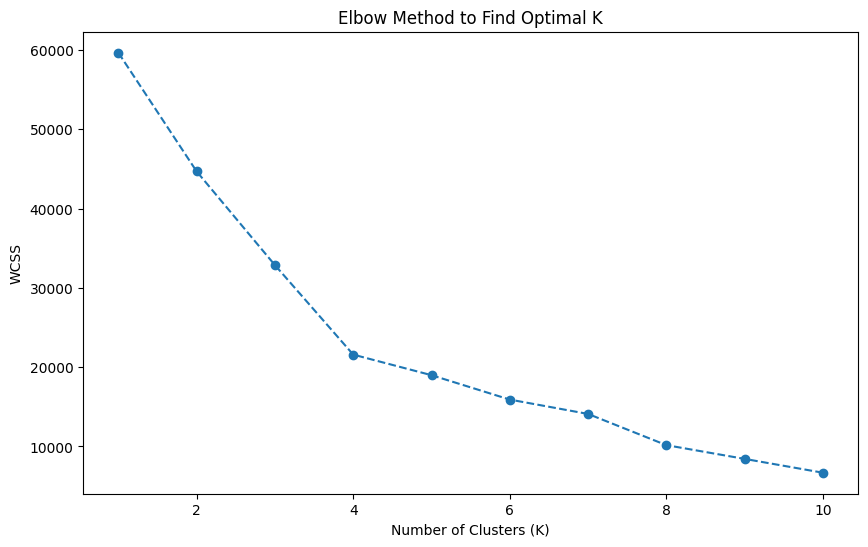

[59667.00000000003,
 44691.164233635165,
 32873.45285685849,
 21587.622516131174,
 18992.169612412712,
 15914.890210849644,
 14103.895322413193,
 10168.042416683194,
 8433.382805077305,
 6689.588698254422]

In [37]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()
wcss

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)
data['Cluster']
#data.head()
#data.tail()
#data.sample(10)

0        0
1        0
2        1
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    0
19999    1
Name: Cluster, Length: 19889, dtype: int32

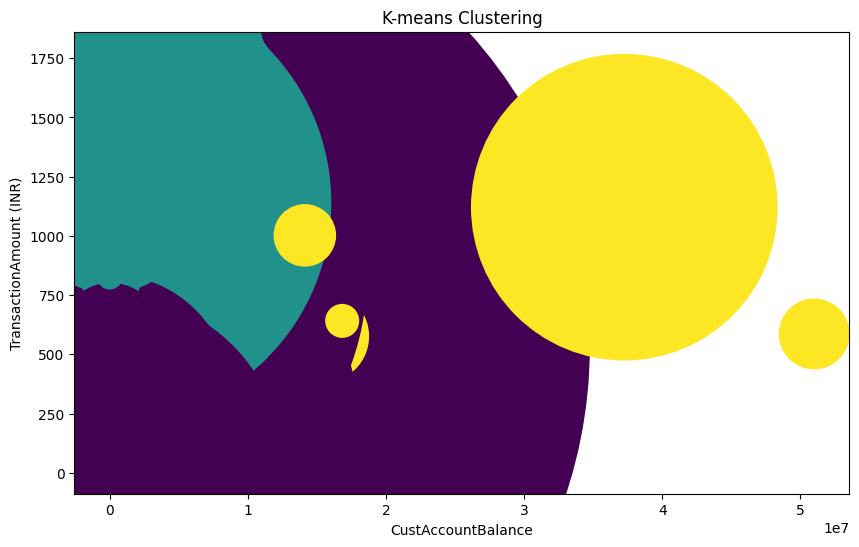

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(data['CustAccountBalance'],data['CustLocation'] ,data['TransactionAmount (INR)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('K-means Clustering')
plt.show()